# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [4]:

# Load the data
df = pd.read_csv("C:/Users/Sayan Mondal/Desktop/New folder (4)/baseball.csv")  # replace with your actual file path

# Exploratory Data Analysis(EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [9]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [10]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Data Visualization()

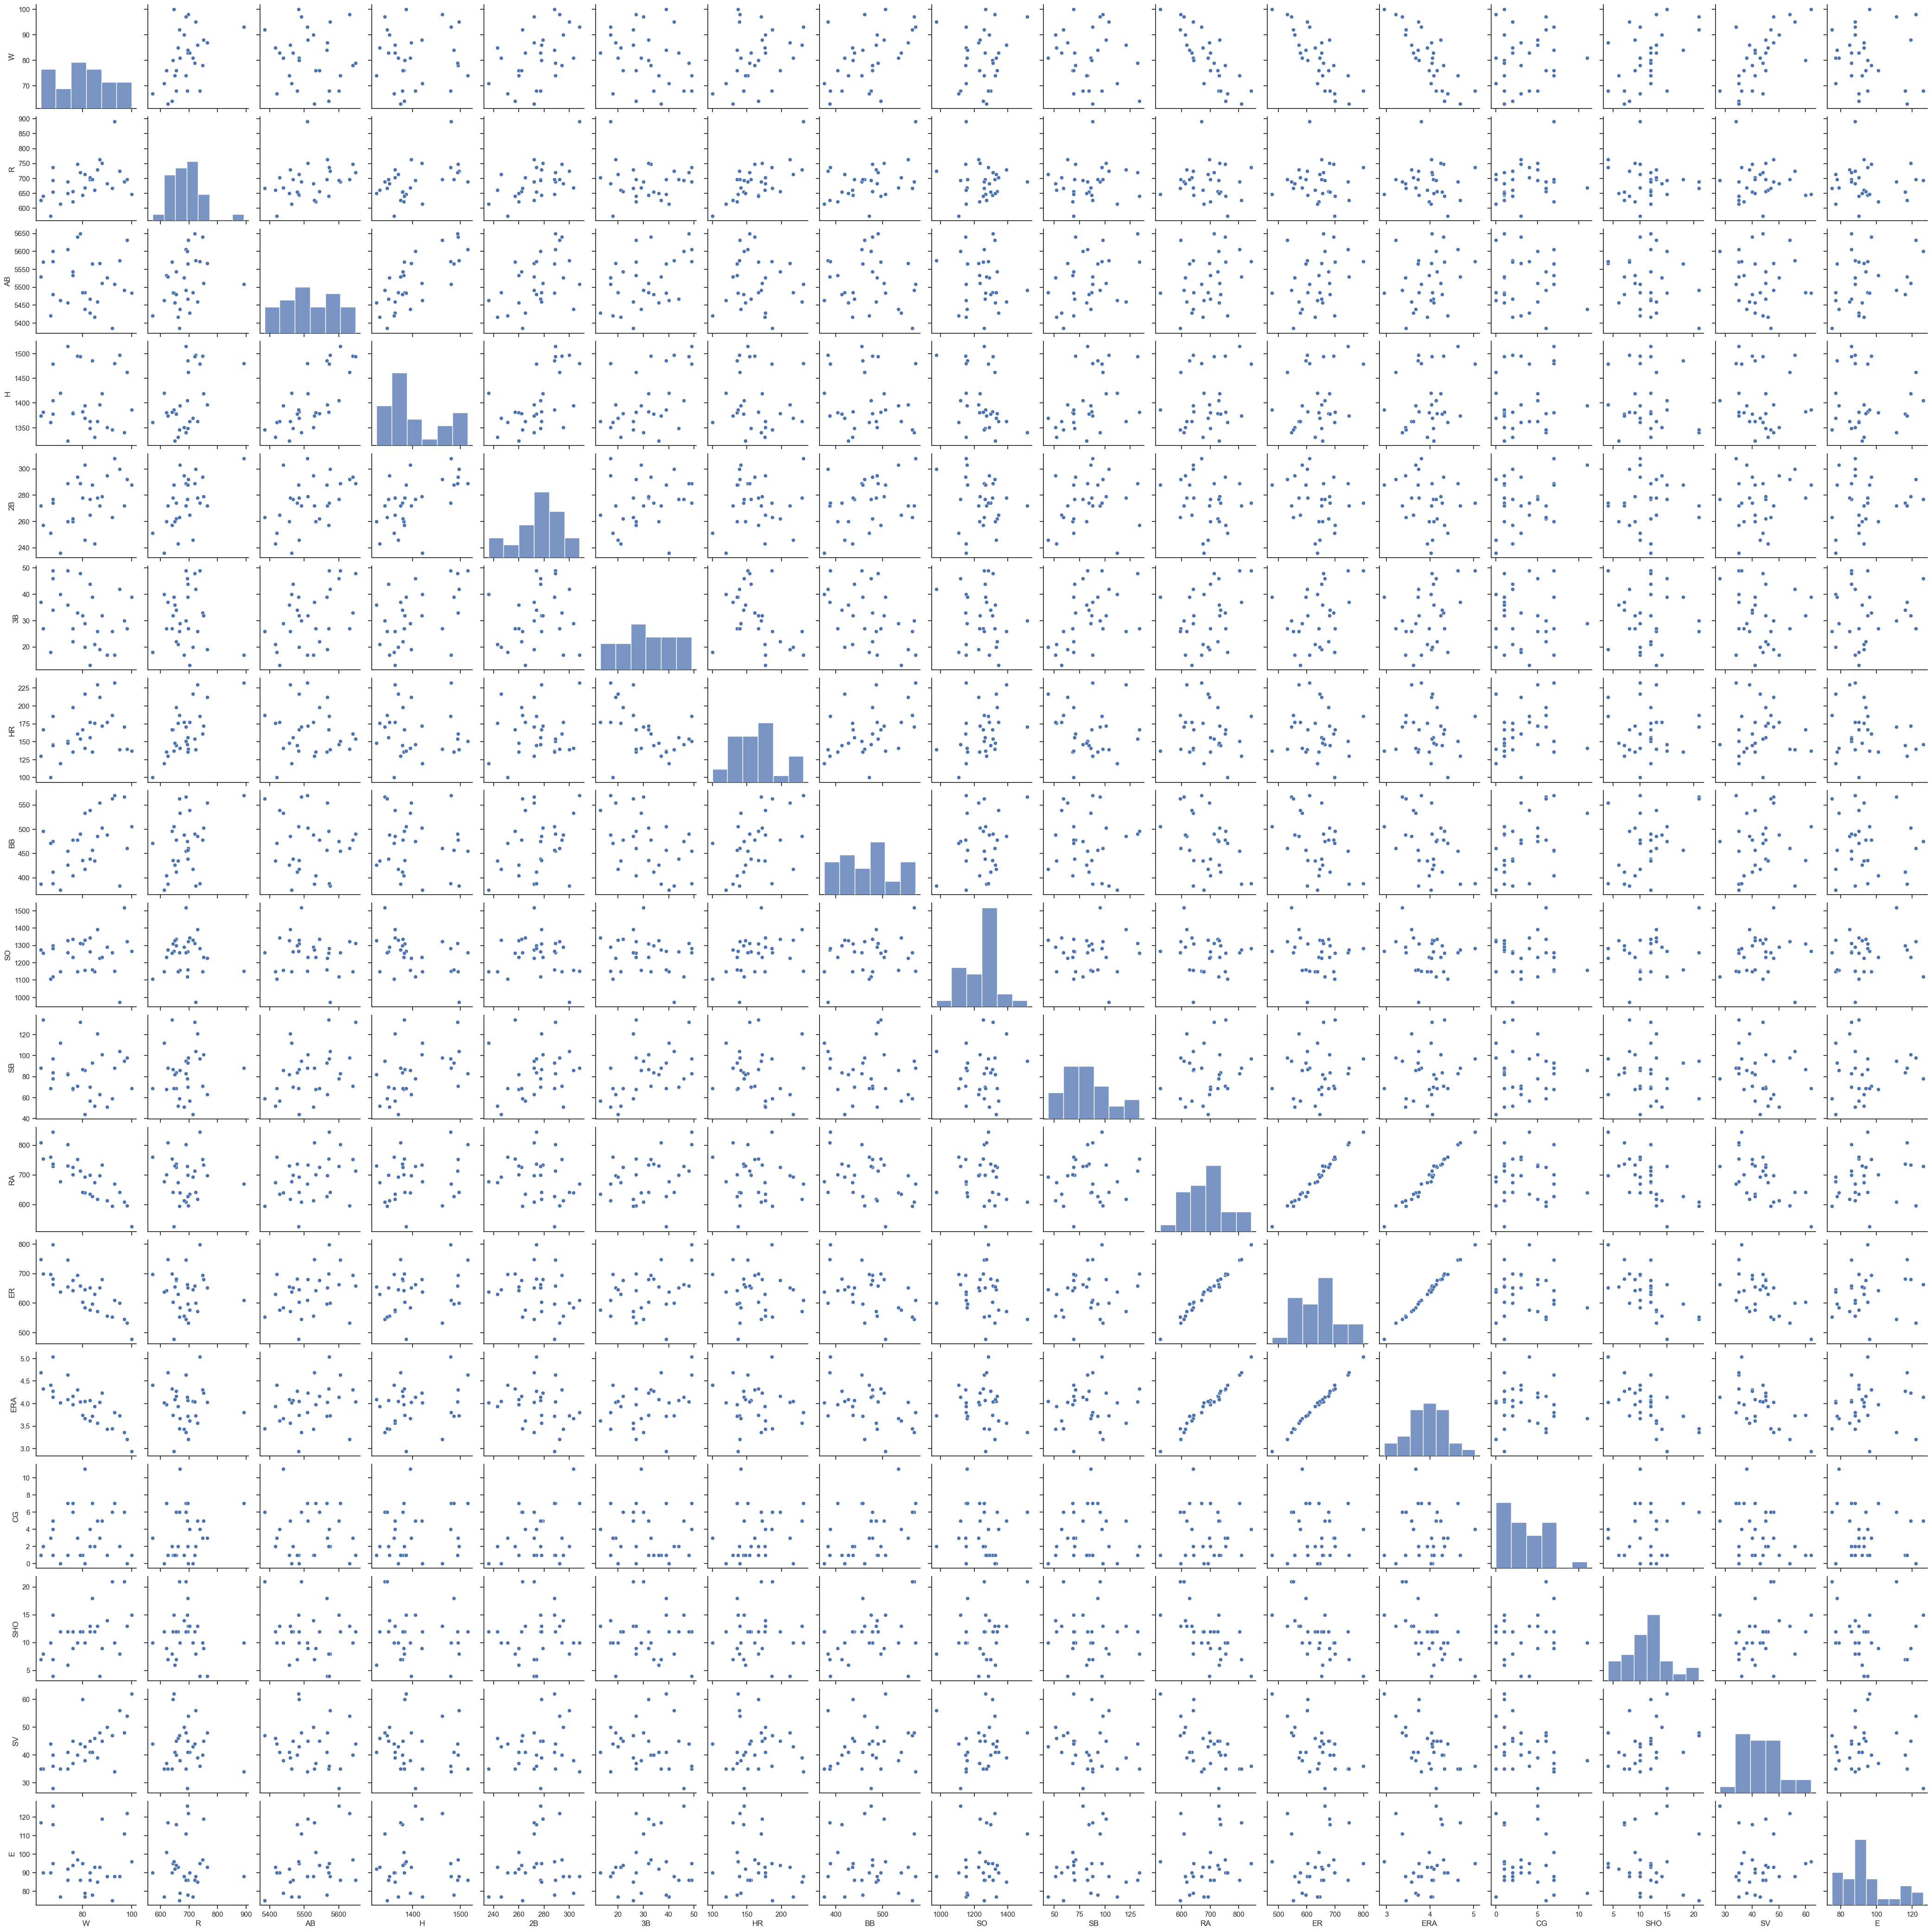

<Figure size 1200x1200 with 0 Axes>

In [13]:
# Pairplot to visualize relationships between numerical columns
sns.set(style='ticks')
sns.pairplot(df[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']])
plt.xlabel('Features')
plt.ylabel('Features')
plt.figure(figsize=(12, 12))
plt.show()

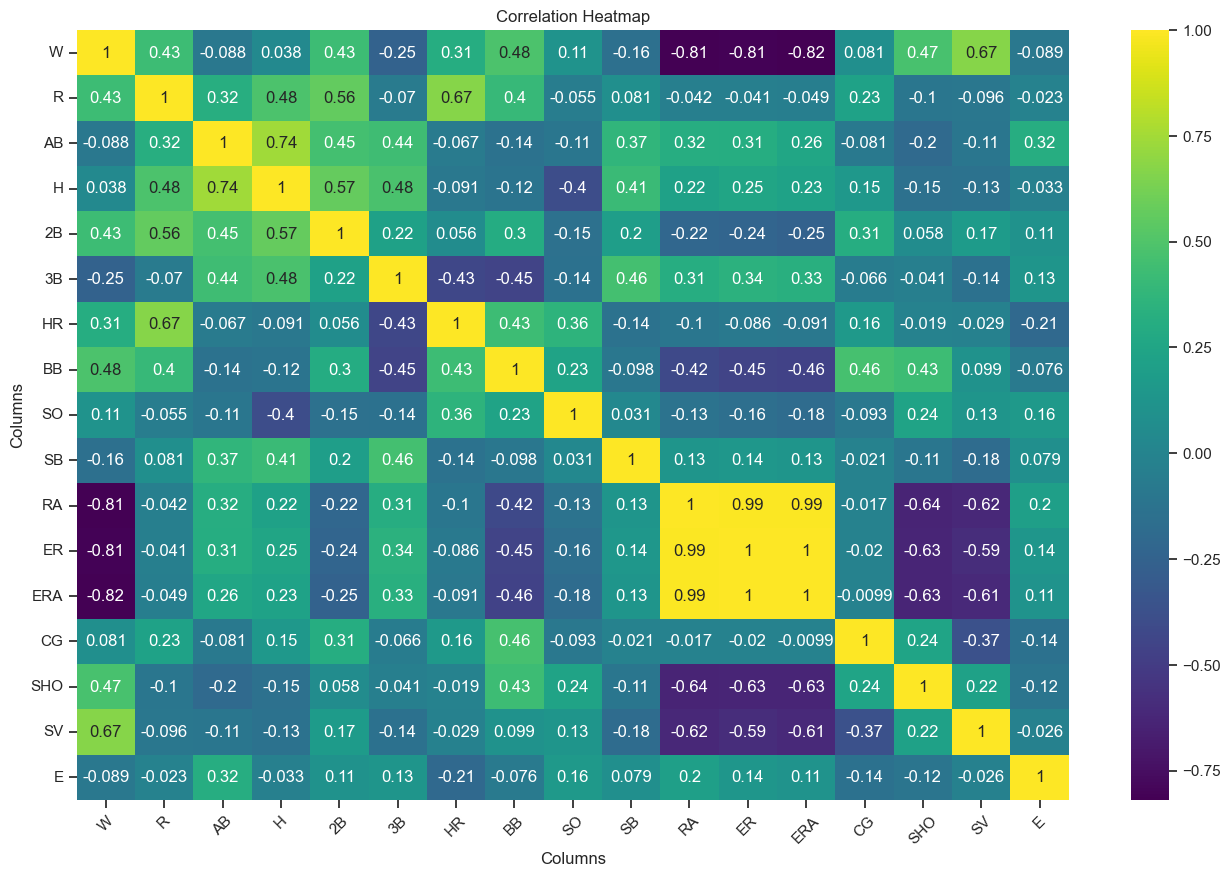

In [14]:
plt.figure(figsize=(16, 10))
correlation = df[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']].corr()
sns.heatmap(correlation, annot=True, cmap='viridis', annot_kws={"fontsize": 12})
plt.title('Correlation Heatmap')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


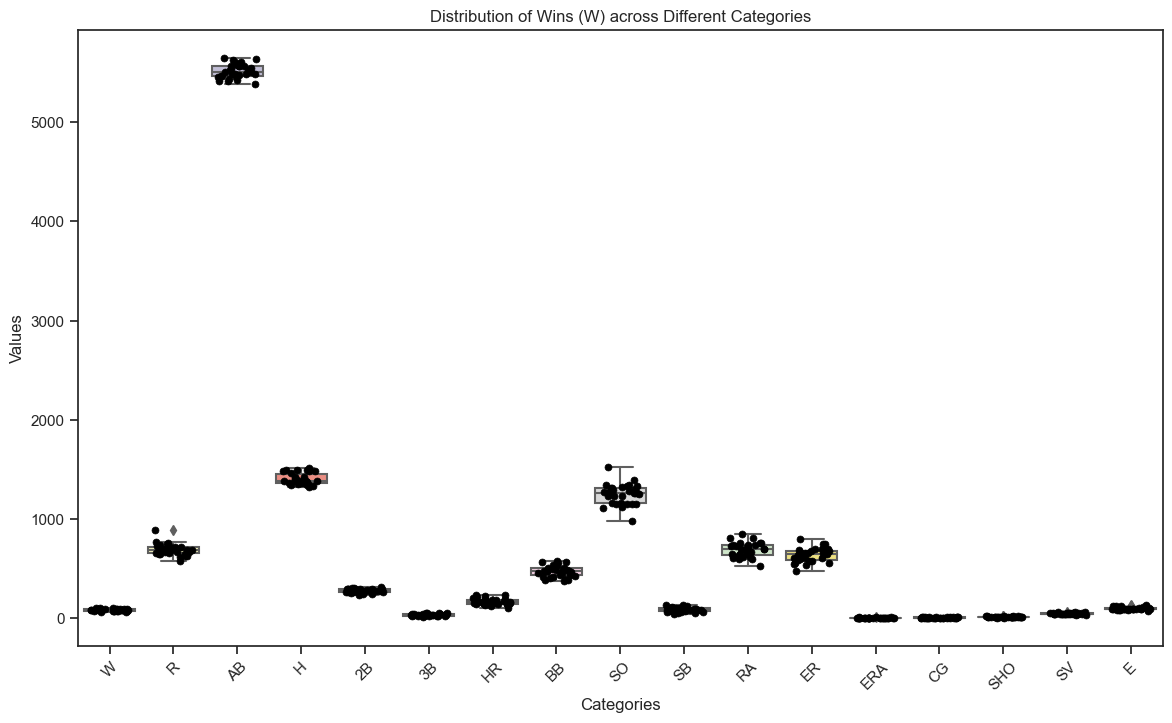

In [15]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='variable', y='value', data=pd.melt(df[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']]), palette='Set3')
sns.stripplot(x='variable', y='value', data=pd.melt(df[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']]), color='black', linewidth=0.5, jitter=0.3)
plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Distribution of Wins (W) across Different Categories')
plt.show()


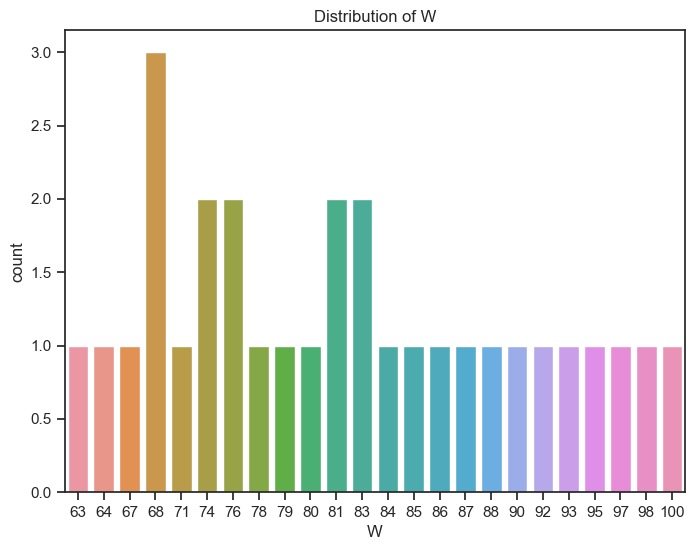

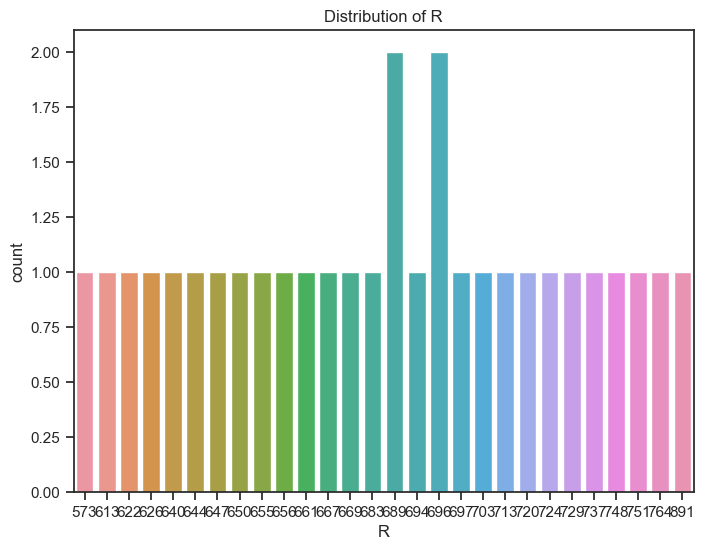

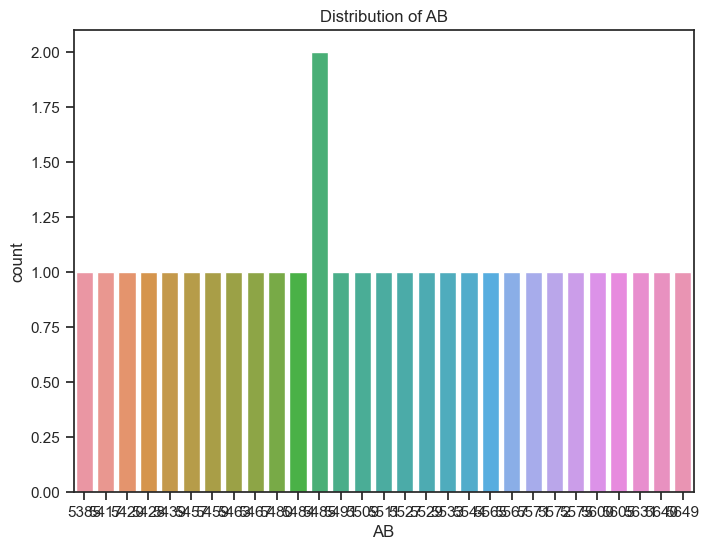

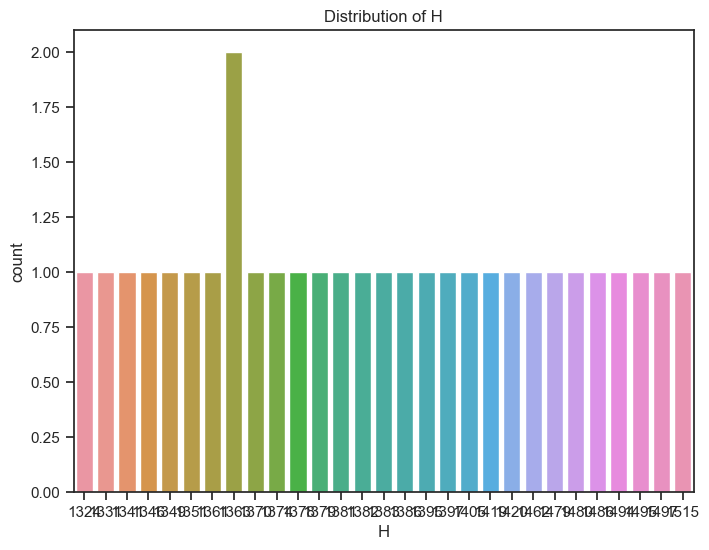

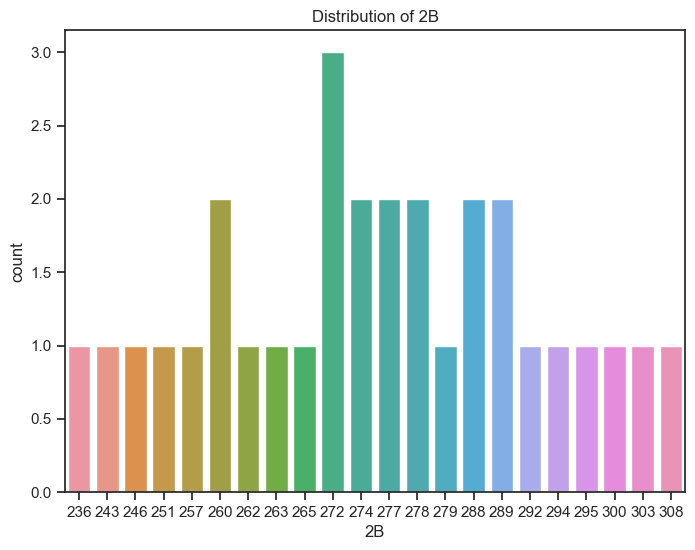

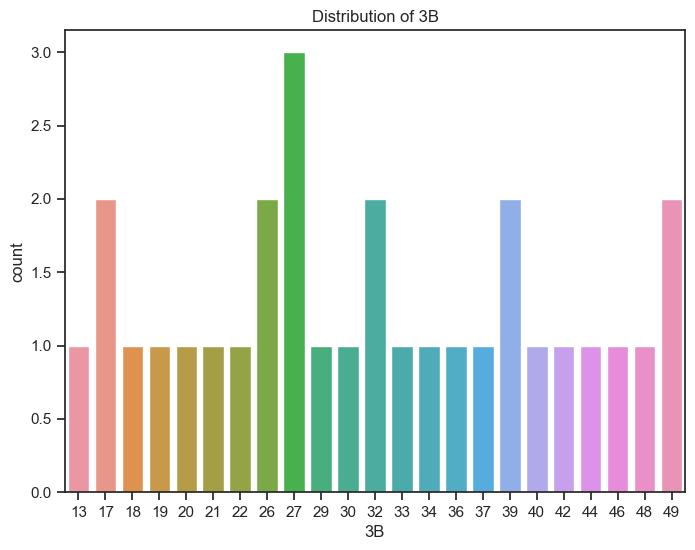

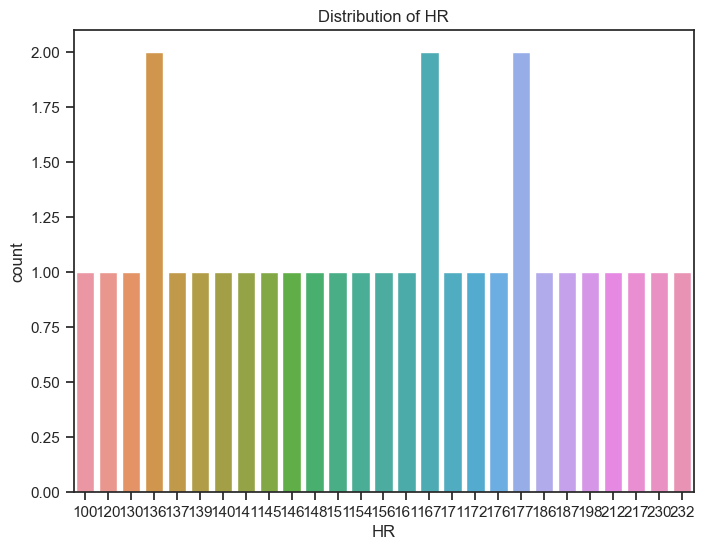

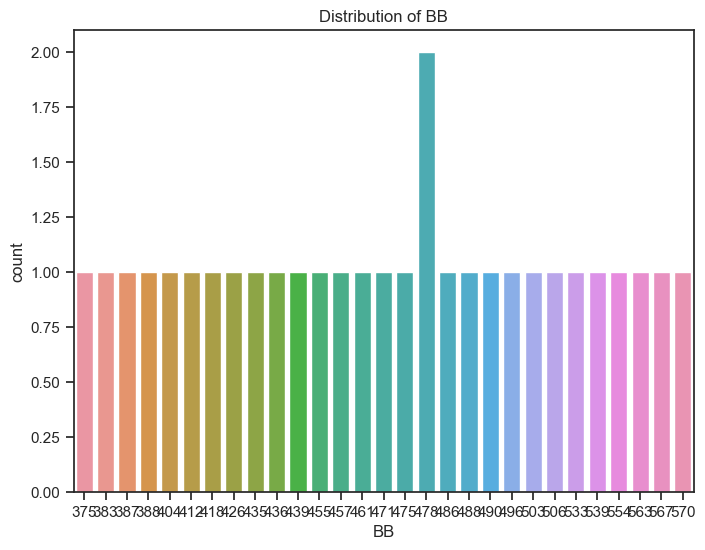

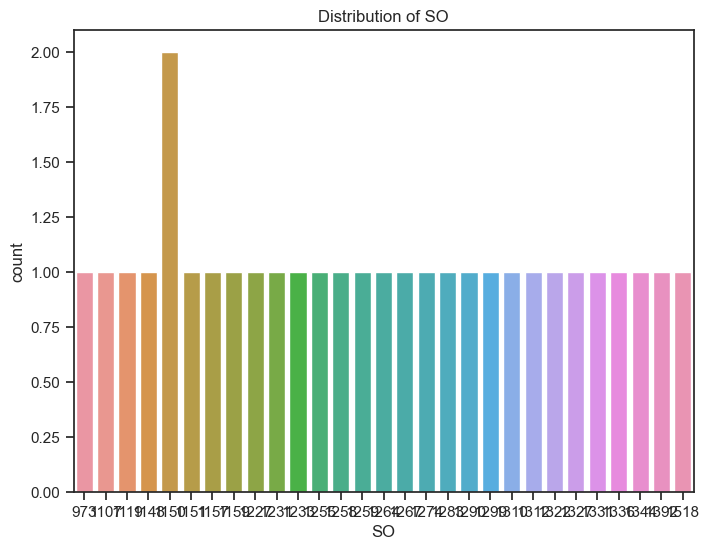

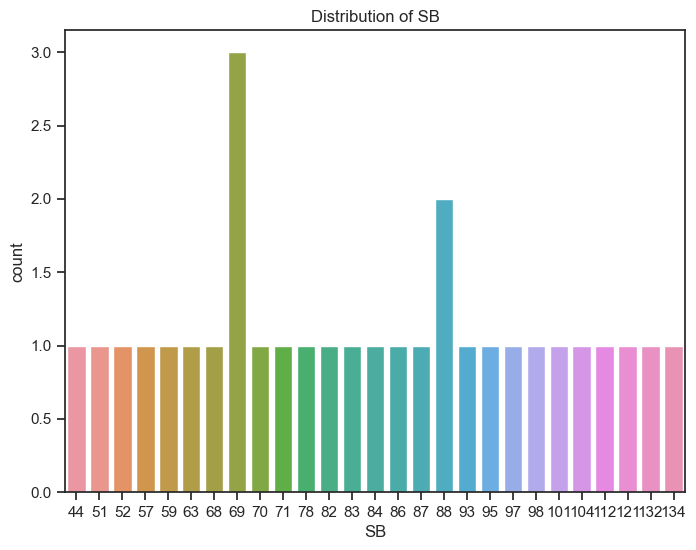

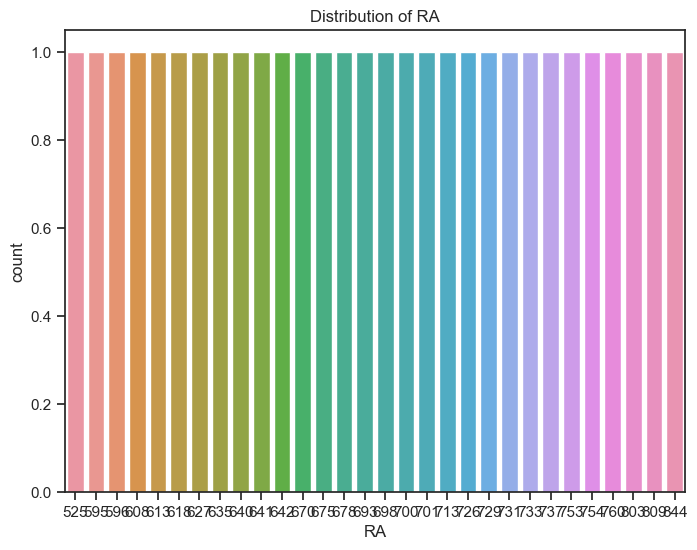

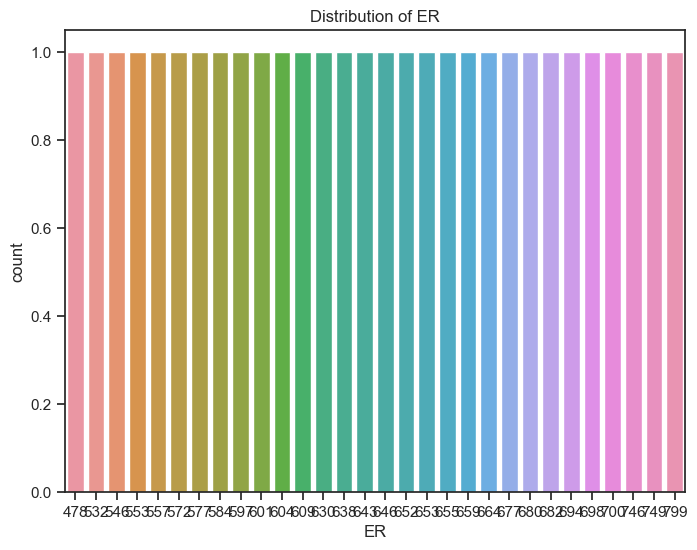

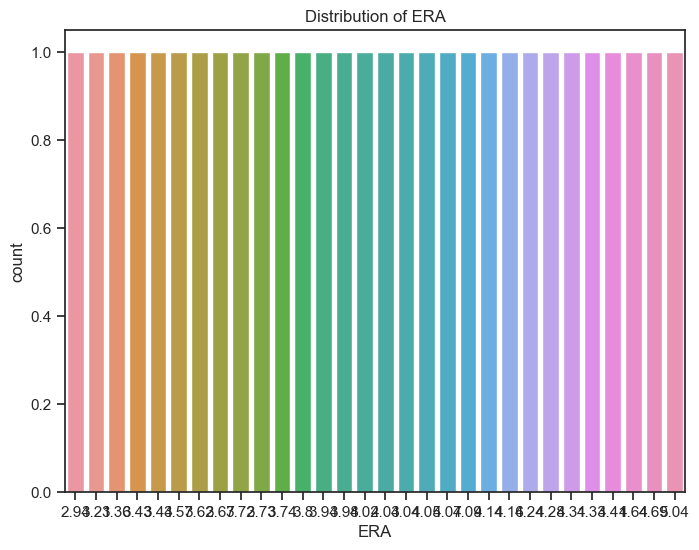

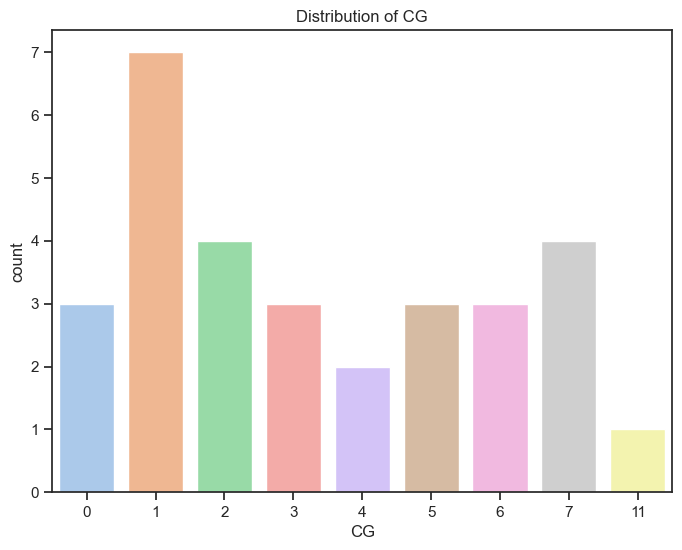

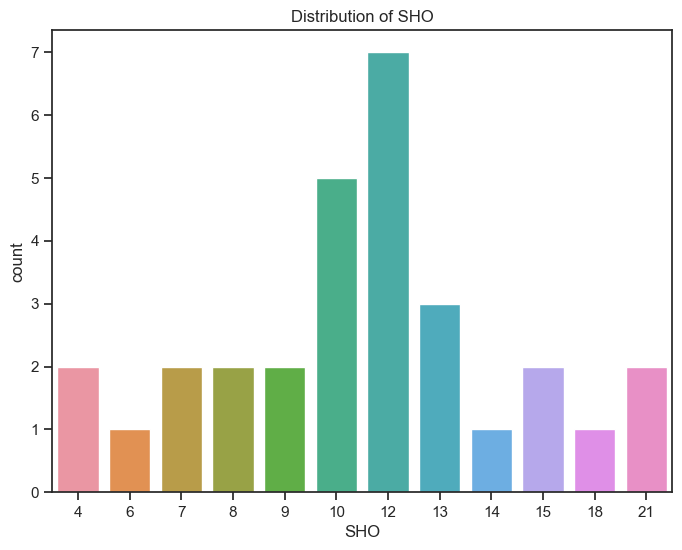

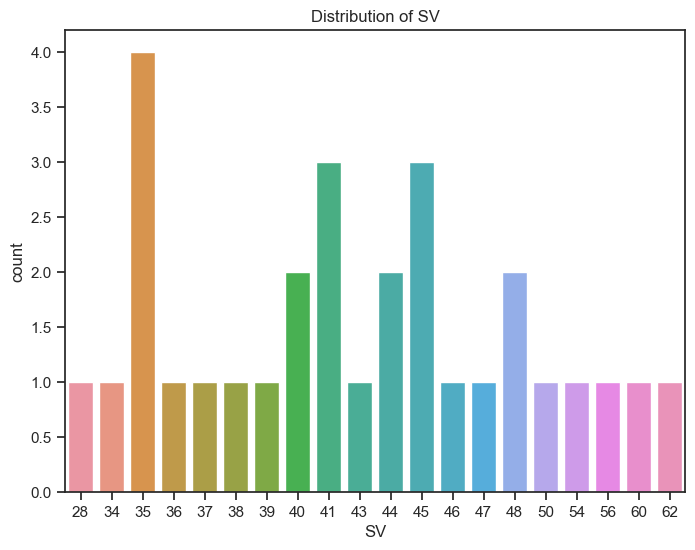

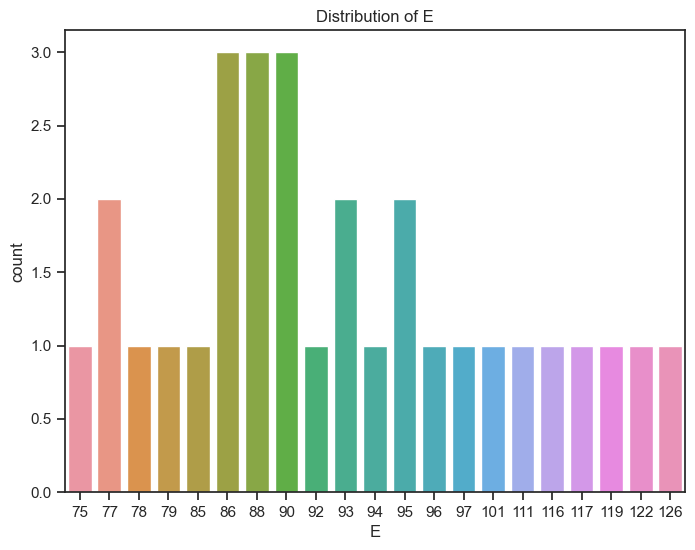

In [19]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

# Splitting Data for Modelling

In [20]:
X = data.drop(['W'], axis=1)
y = data['W']

In [21]:
print(X)

      R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0   724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1   696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2   669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3   622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4   689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   
5   891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10   
6   764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3    4   
7   713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   10   
8   644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   12   
9   748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   10   
10  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5    9   
11  729  5459  1363  278  26  230  486  1392  121  618  572  3.5

In [23]:
print(y)

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64


Standarisation of DATA

In [24]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [28]:
print(X_train)

[[-7.49267675e-01 -8.76730391e-01 -1.42626801e+00 -7.46591049e-01
   4.96411016e-01 -6.14125573e-01 -6.45832008e-01  9.42181733e-01
  -2.60854672e-02  5.65897507e-01  2.09013641e-01  2.26914809e-01
  -9.50247715e-01 -1.21389357e+00 -6.29990790e-02 -1.32143999e-01]
 [-1.16990918e+00  2.44653855e-01 -5.11015811e-01 -9.50206789e-02
   5.91721931e-01 -1.18222460e+00 -1.31675183e+00  3.61534851e-01
   2.42222195e-01  1.74558585e+00  1.66436788e+00  1.66637439e+00
  -9.50247715e-01 -9.60559261e-01 -9.70185816e-01  1.55480067e+00]
 [-5.56473654e-01 -1.49972164e+00 -1.29813270e+00 -1.66964907e+00
  -9.33252709e-01  2.69584031e-01 -4.91004356e-01 -9.96959741e-01
  -1.36762378e+00 -2.81058227e-01 -1.78048657e-01 -1.32950087e-01
  -5.99387020e-01  3.06112292e-01  6.92989869e-01 -6.46662123e-02]
 [ 5.47710289e-01  9.61093789e-01  1.74050460e+00  1.42531018e+00
   1.06827651e+00 -8.98175088e-01 -1.38556412e+00 -2.93610122e+00
   9.57709295e-01 -7.95281351e-01 -6.27040924e-01 -6.36760941e-01
  -5.99

# Various Regression Models to find the best one

In [32]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
linear_accuracy = linear_reg.score(X_test, y_test)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_accuracy = ridge_reg.score(X_test, y_test)

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_accuracy = lasso_reg.score(X_test, y_test)

# Support Vector Regression (SVR)
svr_reg = SVR(C=1.0, kernel='rbf', gamma='scale')
svr_reg.fit(X_train, y_train)
svr_pred = svr_reg.predict(X_test)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
svr_accuracy = svr_reg.score(X_test, y_test)

# K-Nearest Neighbors Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
knn_pred = knn_reg.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
knn_accuracy = knn_reg.score(X_test, y_test)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
dt_accuracy = dt_reg.score(X_test, y_test)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_accuracy = rf_reg.score(X_test, y_test)

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
gb_accuracy = gb_reg.score(X_test, y_test)

# Display the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVR', 
              'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MAE': [linear_mae, ridge_mae, lasso_mae, svr_mae, knn_mae, dt_mae, rf_mae, gb_mae],
    'MSE': [linear_mse, ridge_mse, lasso_mse, svr_mse, knn_mse, dt_mse, rf_mse, gb_mse],
    'R^2': [linear_r2, ridge_r2, lasso_r2, svr_r2, knn_r2, dt_r2, rf_r2, gb_r2],
    'Accuracy': [linear_accuracy, ridge_accuracy, lasso_accuracy, svr_accuracy, 
                 knn_accuracy, dt_accuracy, rf_accuracy, gb_accuracy]
})

print(results)


                 Model       MAE         MSE       R^2  Accuracy
0    Linear Regression  3.892999   27.943033  0.787640  0.787640
1     Ridge Regression  4.590171   34.601682  0.737036  0.737036
2     Lasso Regression  4.364956   32.398244  0.753782  0.753782
3                  SVR  8.758672  120.150848  0.086884  0.086884
4  K-Nearest Neighbors  5.733333   53.266667  0.595187  0.595187
5        Decision Tree  9.166667   87.833333  0.332489  0.332489
6        Random Forest  6.699984   62.473662  0.525216  0.525216
7    Gradient Boosting  5.495096   44.335849  0.663059  0.663059


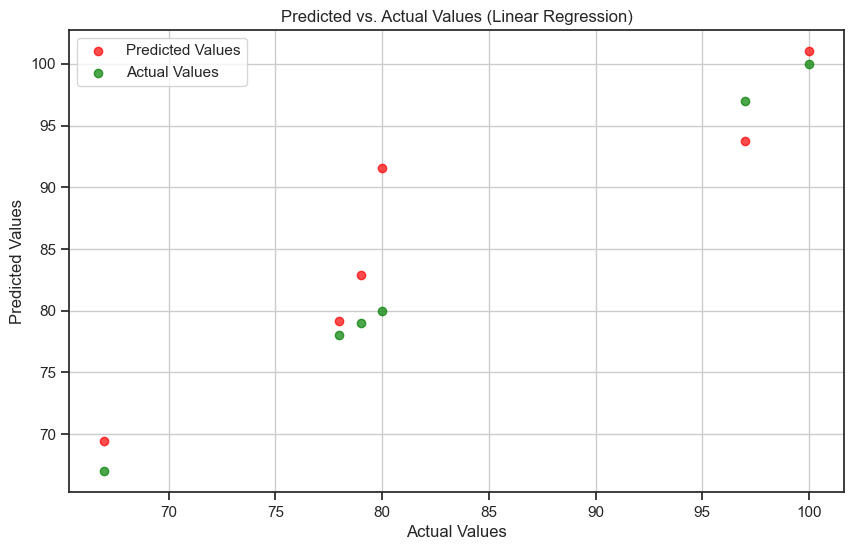

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_pred, label='Predicted Values', color='red', alpha=0.7)

# Green for actual values
plt.scatter(y_test, y_test, label='Actual Values', color='green', alpha=0.7)  # Plot actual values directly on the diagonal

plt.title('Predicted vs. Actual Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

In [39]:
print("Linear Regression Actual Value", y_test)
print("Linear Regression Predicted Value", linear_pred)

Linear Regression Actual Value 27     79
15    100
23     67
17     97
8      80
9      78
Name: W, dtype: int64
Linear Regression Predicted Value [ 82.87055379 101.01861025  69.42504558  93.71375515  91.5547615
  79.20277886]


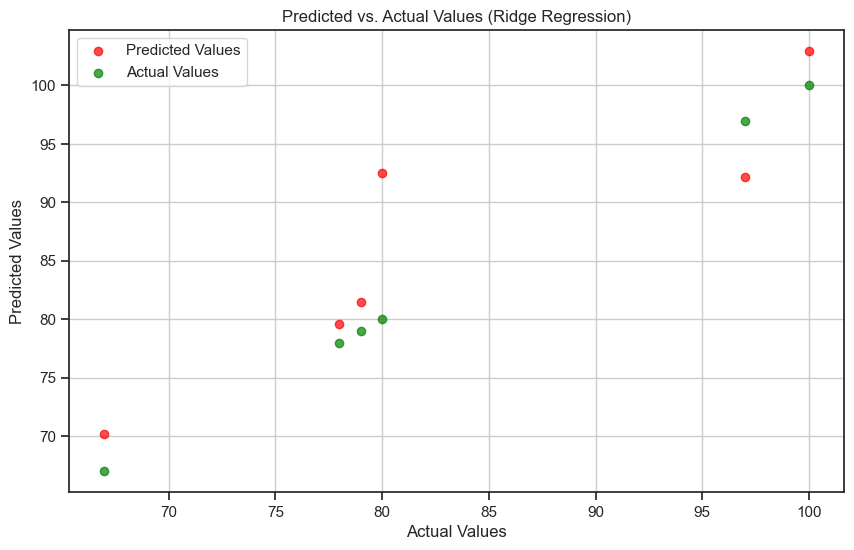

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, label='Predicted Values', color='red', alpha=0.7)

# Green for actual values
plt.scatter(y_test, y_test, label='Actual Values', color='green', alpha=0.7)  # Plot actual values directly on the diagonal

plt.title('Predicted vs. Actual Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

In [41]:
print("Ridge Regression Actual Value", y_test)
print("Ridge Regression Predicted Value", ridge_pred)

Ridge Regression Actual Value 27     79
15    100
23     67
17     97
8      80
9      78
Name: W, dtype: int64
Ridge Regression Predicted Value [ 81.4689723  102.92425195  70.20089251  92.20296237  92.53370433
  79.61616535]


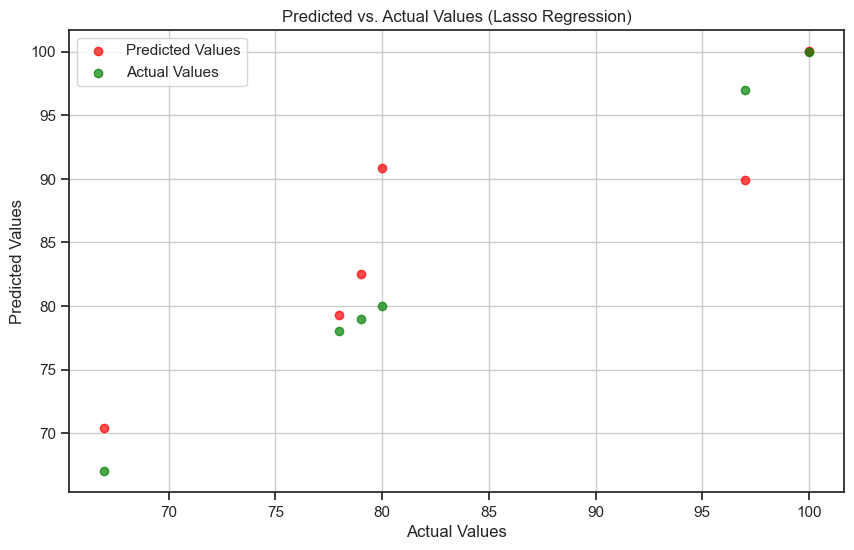

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, label='Predicted Values', color='red', alpha=0.7)

# Green for actual values
plt.scatter(y_test, y_test, label='Actual Values', color='green', alpha=0.7)  # Plot actual values directly on the diagonal

plt.title('Predicted vs. Actual Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

In [42]:
print("Lasso Regression Actual Value", y_test)
print("Lasso Regression Predicted Value", lasso_pred)

Lasso Regression Actual Value 27     79
15    100
23     67
17     97
8      80
9      78
Name: W, dtype: int64
Lasso Regression Predicted Value [ 82.49532411 100.04324469  70.38309507  89.88705725  90.88679743
  79.26832917]


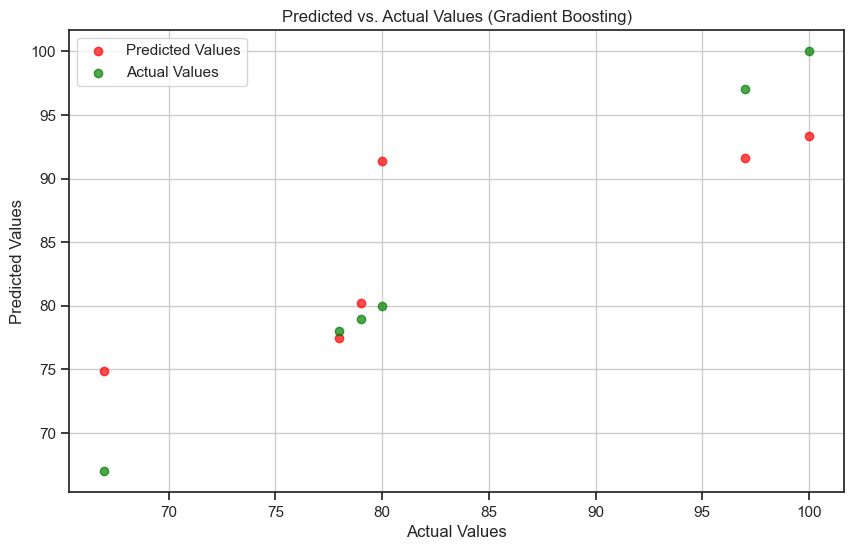

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_pred, label='Predicted Values', color='red', alpha=0.7)

# Green for actual values
plt.scatter(y_test, y_test, label='Actual Values', color='green', alpha=0.7)  # Plot actual values directly on the diagonal

plt.title('Predicted vs. Actual Values (Gradient Boosting)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

In [43]:
print("Gradient Boosting Regression Actual Value", y_test)
print("Gradient Boosting Regression Predicted Value", gb_pred)

Gradient Boosting Regression Actual Value 27     79
15    100
23     67
17     97
8      80
9      78
Name: W, dtype: int64
Gradient Boosting Regression Predicted Value [80.23225111 93.36371001 74.83990475 91.63229654 91.39887661 77.50444904]


In [52]:
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
linear_reg = LinearRegression()

# Define the parameter grid to search
param_grid = {
    'fit_intercept': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=linear_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_linear_reg = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_linear_reg.predict(X_test)

# Evaluate the performance of the best model
mse = mean_squared_error(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error on Test Set: {mse}")
# Evaluate the performance of the model

r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")


# Save the trained model
joblib.dump(linear_reg, 'linear_regression_model.pkl')
# Print explanation for selecting the best model
print(f"The final model selected is LinearRegression based on the lowest average R2 score in cross-validation.")
print(f"The hyperparameters of the final model have been tuned using GridSearchCV.")
print("The best model has been saved for production as 'linear_regression_model.pkl'.")

Best Parameters: {'fit_intercept': True}
Mean Squared Error on Test Set: 27.94303250666786
R-squared: 0.7876400316149371
The final model selected is LinearRegression based on the lowest average R2 score in cross-validation.
The hyperparameters of the final model have been tuned using GridSearchCV.
The best model has been saved for production as 'linear_regression_model.pkl'.


In [53]:
# Load the saved model
loaded_linear_model = joblib.load('linear_regression_model.pkl')

# Now you can use loaded_linear_model to make predictions or further evaluations
